# Teknia: Detect the distance in a piece

Packages and load original image

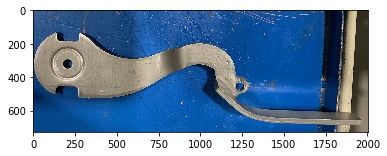

In [ ]:
import cv2 as cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import image as mp_image
from imutils import perspective
import math
from skimage import img_as_ubyte


os.environ["ENABLE_CV2_IMSHOW"] = 'true'

image_file = "IMG_7007.jpg"
image_file2 = "IMG_7008.jpg"
image = mp_image.imread(image_file)
image2 = mp_image.imread(image_file2)
plt.imshow(image)
plt.show()

Processing image

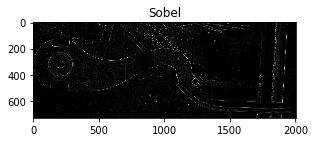

In [ ]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

#Change name of image
sobel_image = edge_sobel(np.array(image))
cv_image = img_as_ubyte(sobel_image)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot Sobel image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")



plt.show()

Detecting circles 1 Piece

Position of centers in X: [1237.  207.]
Position of centers in Y: [455. 320.]
1038.8094146666174


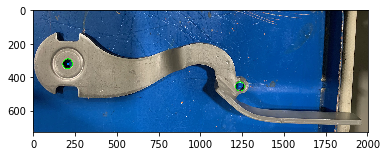

In [ ]:
def distance(p1,p2): 
    return math.sqrt((p1[0] - p1[1])**2 + (p2[0] - p2[1])**2)
  
x1=[]
y1=[]

# detect circles in the image
circles = cv2.HoughCircles(cv_image, cv2.HOUGH_GRADIENT, 1.7, 500,param1=170,param2=75,minRadius=0,maxRadius=30)
output = image.copy() 

# ensure at least some circles were found
if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circle = np.round(circles[0, :]).astype("int")

  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circle:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    x1= np.append(x1,x)
    y1= np.append(y1,y)
  print("Position of centers in X:",x1)
  print("Position of centers in Y:",y1)
  
  # Print 1 distance if 2 circles where detected
  if len(x1) == 2:
    dist = distance(x1,y1)
    print(dist)
  # Print 2 distances if 4 circles are detected  
  if len(x1) == 4:
    index1= np.where(y1 == np.amin(y1))
    index2= np.where(y1 == np.amin(y1[y1 != np.amin(y1)]))
    index4= np.where(y1 == np.amax(y1))
    index3= np.where(y1 == np.amax(y1[y1 != np.amax(y1)]))
    dist1 = distance([x1[index1],x1[index2]],[y1[index1],y1[index2]])
    dist2= distance([x1[index3],x1[index4]],[y1[index3],y1[index4]])
    print(dist1)
    print(dist2)
    
  # Show the output image
  plt.imshow(output)
else:
  print("Nothing Found!")

Detecting circles 2 Pieces

[701.]
[242.]
[701. 394.]
[242. 676.]
[ 701.  394. 1662.]
[242. 676. 230.]
[ 701.  394. 1662. 1315.]
[242. 676. 230. 739.]
961.0749190359719
923.1522084683544


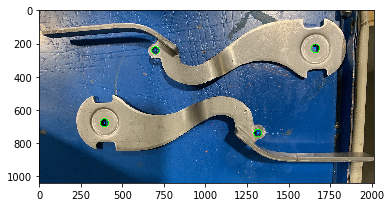

In [ ]:
def distance(p1,p2): 
    return math.sqrt((p1[0] - p1[1])**2 + (p2[0] - p2[1])**2)
  
x1=[]
y1=[]
# detect circles in the image
circles = cv2.HoughCircles(cv_image, cv2.HOUGH_GRADIENT, 1.7, 500,param1=170,param2=75,minRadius=0,maxRadius=35)
output = image2.copy() 

# ensure at least some circles were found
if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circle = np.round(circles[0, :]).astype("int")

  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circle:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    x1= np.append(x1,x)
    y1= np.append(y1,y)
  print("Position of centers in X:",x1)
  print("Position of centers in Y:",y1)
  
  # Print 1 distance if 2 circles where detected
  if len(x1) == 2:
    dist = distance(x1,y1)
    print(dist)
  
  # Print 2 distances if 4 circles are detected 
  if len(x1) == 4:
    index1= np.where(y1 == np.amin(y1))
    index2= np.where(y1 == np.amin(y1[y1 != np.amin(y1)]))
    index4= np.where(y1 == np.amax(y1))
    index3= np.where(y1 == np.amax(y1[y1 != np.amax(y1)]))
    dist1 = distance([x1[index1],x1[index2]],[y1[index1],y1[index2]])
    dist2= distance([x1[index3],x1[index4]],[y1[index3],y1[index4]])
    print(dist1)
    print(dist2)
    
  # Show the output image
  plt.imshow(output)
else:
  print("Nothing Found!")

## WITHOUT SOBEL

In [ ]:
img = cv2.imread(image_file)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
plt.imshow(thresh)
plt.show()

1044.8885107991186


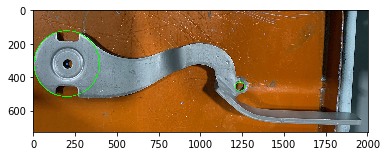

In [ ]:
def distance(p): 
    return math.sqrt((p[0] - p[2])**2 + (p[1] - p[3])**2)

x1=[]
# detect circles in the image
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1.7, 200,minRadius=0,maxRadius=197)
output = img.copy() 
# ensure at least some circles were found
if circles is not None:
  # convert the (x, y) coordinates and radius of the circles to integers
  circle = np.round(circles[0, :]).astype("int")

  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circle:
    # draw the circle in the output image, then draw a rectangle
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    x1= np.append(x1,[x,y])
    #print(x1)
  if len(x1) == 4:
    dist = distance(x1)
    print(dist)
  # show the output image
  plt.imshow(output)
else:
  print("Nothing Found!")

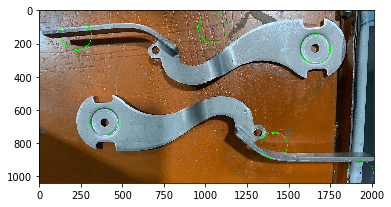

In [ ]:
mask = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                             cv2.THRESH_BINARY_INV,33,2)

kernel = np.ones((3, 3), np.uint8)

#Use erosion and dilation combination to eliminate false positives. 
#In this case the text Q0X could be identified as circles but it is not.
mask = cv2.erode(mask, kernel, iterations=6)
mask = cv2.dilate(mask, kernel, iterations=3)

closing = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
circles = cv2.HoughCircles(thresh,cv2.HOUGH_GRADIENT,1.6,500,
                           param1=100,param2=30, minRadius=0,maxRadius=90)
output = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
  
plt.imshow(output)